# Chapter 1 On the resolving $\mathbf{DCT}$, $\mathbf{D}^{\top}\mathbf{D}$ and Three Kernels problem

Feng Yin  
Department of Geography, UCL  
ucfafyi@ucl.ac.uk  


<br/>

In this chapter, I am going to try to find an analytical way of calculating Observation, prior and spatial or temporal constrains problem in data assimilation system in a matrix form by solving:
$$\mathbf{A}{\mathbf{x}}=\mathbf{b}$$ 
Particularly, with an example of solving the kernel inversion of BRDF from MODIS observations with nearly a years observations.

The BRDF linear kernel model:
$$\rho(\lambda, \Omega, \Omega^`) = f_{iso}(\lambda) + f_{geo}(\lambda)k_{geo}(\Omega, \Omega^`) + f_{vol}(\lambda)k_{vol}(\Omega, \Omega^`)$$

If we have multiple days observations or multiple time stamp observations we put them a matrix form:

$$
\left|\begin{array}{cccc}
k_{iso_1} & 0 &\mathbf{0}&0\\
0&k_{iso_1} &\mathbf{0}&0\\
\mathbf{0} & \mathbf{0} &...&0\\
0 & 0 &\mathbf{0}& k_{iso_n}
\end{array}\right|
\left|\begin{array}{cccc}
k_{geo_1} & 0 &\mathbf{0}&0\\
0&k_{geo_1} &\mathbf{0}&0\\
\mathbf{0} & \mathbf{0} &...&0\\
0 & 0 &\mathbf{0}& k_{geo_n}
\end{array}\right|
\left|\begin{array}{cccc}
k_{vol_1} & 0 &\mathbf{0}&0\\
0&k_{vol_1} &\mathbf{0}&0\\
\mathbf{0} & \mathbf{0} &...&0\\
0 & 0 &\mathbf{0}& k_{vol_n}
\end{array}\right|
\bullet{}
\left|\begin{array}{c}
f_{iso_1}\\
f_{iso_1}\\
...\\
f_{is0_n}\\
---\\
f_{geo_1}\\
f_{geo_1}\\
...\\
f_{geo_n}\\
---\\
f_{vol_1}\\
f_{vol_1}\\
...\\
f_{vol_n}
\end{array}\right|
\mathbf{=}
\left|\begin{array}{c}
ref_{1}\\
ref_{2}\\
...\\
ref_{n}
\end{array}\right|
$$

$\mathbf{0}$ stands for many $0$s, $n-3$ specifically. Each type kernel has a shape of $n$ by $n$, leading to a $n$ by $3n$ for the kernels matrix. The $f$ matrix is a vector with length of $3n$, then the shape of righ handside is $n$.

If we group them together by the kernel type, the whole equation becomes:
$$
\left|\begin{array}{ccc}
\mathbf{k_{iso}}
|
\mathbf{k_{geo}}
|
\mathbf{k_{vol}}
\end{array}\right|
\bullet{}
\left|\begin{array}{c}
\mathbf{f_{iso}}\\
\mathbf{f_{geo}}\\
\mathbf{f_{vol}}
\end{array}\right|
\mathbf{ = }
 \mathbf{ref}
$$

<br/>

In which $\mathbf{k_{*}}$ are diagnal matrix, with entries of $[k_{*_1}, k_{*_2}, ..., k_{*_n}]$, and $\mathbf{f_{*}}$ consists of $[f_{*_1}, f_{*_2}, ..., f_{*_n}]$, while $\mathbf{ref}$ has only $n$ entries $[ref_1, ref_2, ..., ref_n]$ 

<br/>

If we want to solve this system, we first multiply both side with transpose of kernel matrix: 
$
\left|\begin{array}{c}
\mathbf{k_{iso}}\\
\mathbf{k_{geo}}\\
\mathbf{k_{vol}}
\end{array}\right|
$

<br/>
and we get:


$$
\left|\begin{array}{c}
\mathbf{k_{iso}}\\
\mathbf{k_{geo}}\\
\mathbf{k_{vol}}
\end{array}\right|
\bullet{}
\left|\begin{array}{ccc}
\mathbf{k_{iso}}
\mathbf{k_{geo}}
\mathbf{k_{vol}}
\end{array}\right|
\bullet{}
\left|\begin{array}{c}
\mathbf{f_{iso}}\\
\mathbf{f_{geo}}\\
\mathbf{f_{vol}}
\end{array}\right|
\mathbf{ = }
\left|\begin{array}{c}
\mathbf{k_{iso}}\\
\mathbf{k_{geo}}\\
\mathbf{k_{vol}}
\end{array}\right|
\bullet{}
\mathbf{ref}
$$

<br/>

If we let $\mathbf{K} = 
\left|\begin{array}{ccc}
\mathbf{k_{iso}}
\mathbf{k_{geo}}
\mathbf{k_{vol}}
\end{array}\right|
$, and 
$
\mathbf{x} = [\mathbf{f_{iso}}, \mathbf{f_{geo}}, \mathbf{f_{vol}}]^{\top}
$, which is what we want to solve, then the equation shrinking down to:
$$
\mathbf{K^\top}\mathbf{K}\mathbf{x} = \mathbf{K^\top}\mathbf{ref}
$$

Intuitively, $\mathbf{b} = \mathbf{K^\top}\mathbf{ref}$. So the solution for this problem is:
$$
\mathbf{x} = (\mathbf{K^\top}\mathbf{K})^{-1}\mathbf{b}
$$
But $\mathbf{K^\top}\mathbf{K}$ is singular and not invertible, so we need to put some information to the left handside and make it to be nonsingular and invertible. 

Actually, the physical meaning behind this problem is that we are trying to solve a system with 3 times of variables than the observations, which is impossible from a information theory point of view. Hence we add need additional $prior$ information about $\mathbf{x}$ to the system to constrain our problem, and in a mathematical view we add something to the left hand side to make it invertible. In one way, we can put a $prior$ to the system if we know what $\mathbf{x}$ should be, and a spectial case is $prior = [\mathbf{p_{iso}}, \mathbf{p_{geo}}, \mathbf{p_{vol}}]$ with no correlation between elements. Or, we can have some kind of temporal constrain on the three types of kernels $\mathbf{f}$, basically, we assume for each type of kernels $\mathbf{f}$ dose not change from $time_1$ to $time_2$ in a temporal case, and in $x$ and $y$ direction for a spatial case. The temporal $and$ / $or$ spatial constrain are/is generally represensted by second difference matrix $\mathbf{D}^{\top}\mathbf{D}$, which is a product of first difference matrix:

$$
\mathbf{D} = 
\left|\begin{array}{cccc}
-1&1&0&...&0\\
0&-1&1&...&0\\
...&...&...&...&...\\
...&...&...&-1&1\\
0&0&...&0&-1
\end{array}\right|
\quad \quad
\mathbf{D}^{\top}\mathbf{D}=
\left|\begin{array}{ccccc}
1&-1&0&...&0\\
-1&2&-1&...&0\\
...&...&...&...&...\\
...&...&-1&2&-1\\
0&0&...&-1&1
\end{array}\right|
$$

So in the following contents, I will first start to solve the system with a $prior$ with no correlation on between elements analytically. Then I will try to solve the system with a temporal constrain, *i.e.*, $\mathbf{D}^{\top}\mathbf{D}$.



### A $prior$

Following the introduction part, we are trying to add a $prior$ to the system:


$$
\left[\begin{array}{c}
prior_{iso_1},\quad prior_{iso_2},  \quad...,\quad prior_{iso_n} \quad |\quad prior_{geo_1}, \quad prior_{geo_2},\quad ...,\quad prior_{geo_n}\quad |\quad prior_{vol_1},\quad prior_{vol_2},\quad ...,\quad prior_{vol_n}
\end{array}\right]^{\top}
$$


Grouping them together $\left|\begin{array}{c}
\mathbf{prior_{iso}}\\
\mathbf{prior_{geo}}\\
\mathbf{prior_{vol}}
\end{array}\right|$

In which all the off diagnal elements are $0$s, which means we expect a independent $prior$ and having no correlations between each type of $prior$ and even in the same type of $prior$. In a data assimilation point of view, we add some extra information about what $\mathbf{x}$ should be look like to constrain the solution, but also we want to give some kind of weight to them, in this case, we use uncertainty, to be able to say to what extend we believe our $prior$. We generally use $\mathbf{C}$ to represent the uncertainty associated with the variables and also the correlations between them, but most of the case we use the inverse of it, because which essentially is the 'believe' about our variables, and we can call it **information matrix** $Y$, but we still use $\mathbf{C}^{-1}$ to represent it. So from this we get following equation:

$$
\left|\begin{array}{c}
\mathbf{f_{iso}}\\
\mathbf{f_{geo}}\\
\mathbf{f_{vol}}
\end{array}\right|
\approx
\left|\begin{array}{c}
\mathbf{prior_{iso}}\\
\mathbf{prior_{geo}}\\
\mathbf{prior_{vol}}
\end{array}\right|
$$


And if we let $\mathbf{x_{prior}} = [\mathbf{prior_{iso}}, \mathbf{prior_{geo}}, \mathbf{prior_{vol}}]^{\top}$ and put in the information matrix $\mathbf{C}^{-1}_{prior}$, then:

$$
\mathbf{C}^{-1}_{prior}\mathbf{x} \approx \mathbf{C}^{-1}_{prior}\mathbf{x_{prior}}
$$

This is an interesting equation, if we know $\mathbf{x}$ then we know the exact $\mathbf{x_{prior}}$ to change $\approx$ to $=$ and we solve the system! **But we do not know $\mathbf{x}$**, and we need to solve it...So we add it with previous equation together, and put the two pieces of information together, which is actually a multiplication of their probability density functions(PDF) by probability theory. Since it is a combination of two independent information, we better have something to tell us about the uncertainty about observations, so we need the uncertainty for our observations $\mathbf{C}_{obs}$ or information matrix $\mathbf{C}^{-1}_{obs}$ and a spectial case is no correlation between all the observations. So we get:

$$
\mathbf{C}^{-1}_{prior}\mathbf{x} + \mathbf{K^\top} \mathbf{C}^{-1}_{obs} \mathbf{K}\mathbf{x} = \mathbf{C}^{-1}_{prior}\mathbf{x_{prior}} +  \mathbf{K^\top} \mathbf{C}^{-1}_{obs} \mathbf{ref}
$$

<br/>
And now our in $\mathbf{A}\mathbf{x} = b$ system,  $\mathbf{A} = \mathbf{C}^{-1}_{prior} + \mathbf{K^\top} \mathbf{C}^{-1}_{obs} \mathbf{K}$ and $b = \mathbf{C}^{-1}_{prior}\mathbf{x_{prior}} +  \mathbf{K^\top} \mathbf{C}^{-1}_{obs} \mathbf{ref}$. So to solve the system, we try to get the inverse of $\mathbf{A}$ and $x = \mathbf{A}^{-1}b$. If $\mathbf{A}$ becomes large, a direct inverse of $\mathbf{A}$ would be too expensive to compute and even impossible, but one can of course uses numerical methods to solve this equations without explicitly compute $\mathbf{A}^{-1}$. However, as I have limit $\mathbf{C}^{-1}_{obs}$ and $\mathbf{C}^{-1}_{prior}$ to be diagnal matrixes, and our kernels matrixes' sub-matrixes $\mathbf{k_{iso}},$ $\mathbf{k_{geo}}$ and $\mathbf{k_{vol}}$ are also diagnal matrixes, we can exploit the spatial structure of their combination $\mathbf{A}$ to analytically get the $\mathbf{A}^{-1}$ in a relative cheap way. 

Firstly, we have a deeper inside into the structure of $K^{\top}\mathbf{C}^{-1}_{obs}K$, as our $\mathbf{C}^{-1}_{obs}$ is a diagnal matrix, we can first put it away and multiply them after we get $K^{\top}K$. 

$$
K^{\top}\mathbf{C}^{-1}_{obs}K = 
\left|\begin{array}{c}
\mathbf{k_{iso}}\\
\mathbf{k_{geo}}\\
\mathbf{k_{vol}}
\end{array}\right|
\bullet{}
\left|\begin{array}{ccc}
\mathbf{k_{iso}}
\mathbf{k_{geo}}
\mathbf{k_{vol}}
\end{array}\right|
\mathbf{C}^{-1}_{obs}
=
\left|\begin{array}{ccc}
\mathbf{k_{iso}}\mathbf{k_{iso}}&\mathbf{k_{geo}}\mathbf{k_{iso}}&\mathbf{k_{vol}}\mathbf{k_{iso}}\\
\mathbf{k_{iso}}\mathbf{k_{geo}}&\mathbf{k_{geo}}\mathbf{k_{geo}}&\mathbf{k_{vol}}\mathbf{k_{geo}}\\
\mathbf{k_{iso}}\mathbf{k_{vol}}&\mathbf{k_{geo}}\mathbf{k_{vol}}&\mathbf{k_{vol}}\mathbf{k_{vol}}
\end{array}\right|
\mathbf{C}^{-1}_{obs}
$$ 


The above equation is right as we do the matrix multiplication by [blocks](https://en.wikipedia.org/wiki/Block_matrix) and which is proven to be true. It is worth to point out that $\mathbf{C}^{-1}_{obs}$ having a shape of $ny$ by $ny$, which means every element in the $3$ by $3$ $K^{\top}K$ needs to be multiplied by it and we can treat it as a scalar multiplication in a normal matrix. As our special diagnal shape of $\mathbf{k_{*}}$, the prodcts $\mathbf{k_{*}}\mathbf{k_{*}}$ only involve $diag(\mathbf{k_{*}}) \times diag(\mathbf{k_{*}})$ computations. Also our matrix is symmetric, then we only need to compute the lower diagnal part of $K^{\top}K$, which reduce further 3 multiplications of $diag(\mathbf{k_{*}}) \times diag(\mathbf{k_{*}})$. Since $\mathbf{C}^{-1}_{prior}$, is diagnal matrix, then the left hand side becomes:


$$
\mathbf{A} = 
\left|\begin{array}{ccc}
\mathbf{k_{iso}}\mathbf{k_{iso}} +\frac{ \mathbf{C}^{-1}_{prior_{iso}}}{\mathbf{C}^{-1}_{obs}}&\mathbf{k_{geo}}\mathbf{k_{iso}}&\mathbf{k_{vol}}\mathbf{k_{iso}}\\
\mathbf{k_{iso}}\mathbf{k_{geo}}&\mathbf{k_{geo}}\mathbf{k_{geo}} + \frac{ \mathbf{C}^{-1}_{prior_{geo}}}{\mathbf{C}^{-1}_{obs}}&\mathbf{k_{vol}}\mathbf{k_{geo}}\\
\mathbf{k_{iso}}\mathbf{k_{vol}}&\mathbf{k_{geo}}\mathbf{k_{vol}}&\mathbf{k_{vol}}\mathbf{k_{vol}} + \frac{ \mathbf{C}^{-1}_{prior_{vol}}}{\mathbf{C}^{-1}_{obs}}
\end{array}\right|
\mathbf{C}^{-1}_{obs}
$$


And If we let:


$$
\left|\begin{array}{ccc}
a&b&c\\
d&e&f\\
g&h&i\\
\end{array}\right|
= 
\left|\begin{array}{ccc}
\mathbf{k_{iso}}\mathbf{k_{iso}} +\frac{ \mathbf{C}^{-1}_{prior_{iso}}}{\mathbf{C}^{-1}_{obs}}&\mathbf{k_{geo}}\mathbf{k_{iso}}&\mathbf{k_{vol}}\mathbf{k_{iso}}\\
\mathbf{k_{iso}}\mathbf{k_{geo}}&\mathbf{k_{geo}}\mathbf{k_{geo}} + \frac{ \mathbf{C}^{-1}_{prior_{geo}}}{\mathbf{C}^{-1}_{obs}}&\mathbf{k_{vol}}\mathbf{k_{geo}}\\
\mathbf{k_{iso}}\mathbf{k_{vol}}&\mathbf{k_{geo}}\mathbf{k_{vol}}&\mathbf{k_{vol}}\mathbf{k_{vol}} + \frac{ \mathbf{C}^{-1}_{prior_{vol}}}{\mathbf{C}^{-1}_{obs}}
\end{array}\right|
$$

Then,

$$
\mathbf{A}^{-1} = 
\left|\begin{array}{ccc}
a&b&c\\
d&e&f\\
g&h&i\\
\end{array}\right|^{-1}
\mathbf{C}_{obs}
= 
\frac{1}{det(\mathbf{A})}
\left|\begin{array}{ccc}
A&D&G\\
B&E&H\\
C&F&I\\
\end{array}\right|
\mathbf{C}_{obs}
$$


where 
$$
\begin{array}{ccc}
A=(ei-fh) & D=-(bi-ch) & G=(bf-ce)\\
B=-(di-fg) & E=(ai-cg) & H=-(af-cd)\\ 
C=(dh-eg)  & F=-(ah-bg) & I=(ae-bd)
\end{array}
$$


$$
det(\mathbf{A}) = aA + bB + cC
$$

And in our case, since $\mathbf{A}$ is symmetricm, $\mathbf{A}^{-1}$ is also symmetric, which means $D=B, C=G, H=F$ which again reduce our computation a third. Because our system all of the elements in are blocks of diagnal matrix, we can directly compute on only the diagnals and then reconstruct the out put matrix, which should be fast and easy to do it.

#### Examples:

In [1]:
from IPython.display import display, Markdown, Latex
def disp_array(arrays, ro = 2):
    '''
    small function to display array
    '''
    ar_temp = '''$$
    \left[\\begin{array}{%s}
    %s
    \end{array}\\right]
    $$'''
    to_dis = []
    for array in arrays:
        ny = array.shape[1]
        cs = ['c']*ny        
        temp = '& '.join(['{:5s}', ]*ny)
        ar = '\\\\ '.join([temp.format(*tuple(i.astype(str).tolist())) for i in np.round(array, ro)])
        to_dis += ar_temp%(cs, ar[:-2])
    display(Markdown(''.join(to_dis)))
#disp_array ([np.zeros((3,3)), np.zeros((3,3))])

Here we  first test with a length of $3 \times 3$ example to show the shape of $\mathbf{A}$ and $\mathbf{A}^{-1}$, and also to check the results of analytical way of compute $ \mathbf{A}^{-1}$

In [2]:
import scipy
import numpy as np
import pylab as plt
from scipy import linalg, sparse
%matplotlib inline


nx, ny = 3, 4

# priors
pi = np.ones(ny)
pg = np.ones(ny)
pv = np.ones(ny)

# inverse of Uncertainty for priors and observations
C_pi = 1. / (0.1 * np.ones(ny))
C_pg = 1. / (0.2 * np.ones(ny))
C_pv = 1. / (0.3 * np.ones(ny))
C_obs = 1. / (0.015 * np.ones(ny))
 
# the three base diagnals of K*
# we choose integers to make it 
# easy to print out for visual check
#k_iso, k_geo, k_vol = np.random.rand(ny), np.random.rand(ny), np.random.rand(ny)
k_iso, k_geo, k_vol = np.random.randint(1, 10, size=ny), \
                      np.random.randint(1, 10, size=ny), \
                      np.random.randint(1, 10, size=ny)

# the analytical way inverse
# by products of diagnals
a = k_iso * C_obs * k_iso  + C_pi
b = k_iso * C_obs * k_geo
c = k_iso * C_obs * k_vol
d = b
e = k_geo * C_obs * k_geo + C_pg
f = k_geo * C_obs * k_vol
g = c
h = f
i = k_vol * C_obs * k_vol + C_pv
 
A = e*i - f*h
E = a*i - c*g
I = a*e - b*d                                                                                                                                                                                                                   
D = B = -(d*i - f*g)
C = G = b*f - c*e
F = H = - (a*f - c*d)
det = a*A + b*B + c*C

# reconstruct the inverse of A
# by using the diagnals
r1 = np.hstack([np.diag(A/det), np.diag(D/det), np.diag(G/det)])
r2 = np.hstack([np.diag(B/det), np.diag(E/det), np.diag(H/det)])
r3 = np.hstack([np.diag(C/det), np.diag(F/det), np.diag(I/det)])
a_inv = np.vstack([r1, r2, r3])

# the original K and K.TK
K = np.hstack([np.diag(k_iso), np.diag(k_geo), np.diag(k_vol)])
KK = K.T.dot(np.diag(C_obs)).dot(K)
# A and A inverse
A = KK + scipy.linalg.block_diag(np.diag(C_pi), np.diag(C_pg), np.diag(C_pv))
A_inv = np.linalg.inv(A)

In [3]:
# So K and K.TK:
disp_array([K,])
disp_array([KK,])
try:
    np.linalg.inv(KK)
except np.linalg.linalg.LinAlgError as e:
    print('KK is ' +  str(e))

$$
    \left[\begin{array}{['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']}
    8    & 0    & 0    & 0    & 7    & 0    & 0    & 0    & 4    & 0    & 0    & 0    \\ 0    & 7    & 0    & 0    & 0    & 8    & 0    & 0    & 0    & 2    & 0    & 0    \\ 0    & 0    & 6    & 0    & 0    & 0    & 4    & 0    & 0    & 0    & 3    & 0    \\ 0    & 0    & 0    & 3    & 0    & 0    & 0    & 5    & 0    & 0    & 0    & 1  
    \end{array}\right]
    $$

$$
    \left[\begin{array}{['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']}
    4266.67& 0.0  & 0.0  & 0.0  & 3733.33& 0.0  & 0.0  & 0.0  & 2133.33& 0.0  & 0.0  & 0.0  \\ 0.0  & 3266.67& 0.0  & 0.0  & 0.0  & 3733.33& 0.0  & 0.0  & 0.0  & 933.33& 0.0  & 0.0  \\ 0.0  & 0.0  & 2400.0& 0.0  & 0.0  & 0.0  & 1600.0& 0.0  & 0.0  & 0.0  & 1200.0& 0.0  \\ 0.0  & 0.0  & 0.0  & 600.0& 0.0  & 0.0  & 0.0  & 1000.0& 0.0  & 0.0  & 0.0  & 200.0\\ 3733.33& 0.0  & 0.0  & 0.0  & 3266.67& 0.0  & 0.0  & 0.0  & 1866.67& 0.0  & 0.0  & 0.0  \\ 0.0  & 3733.33& 0.0  & 0.0  & 0.0  & 4266.67& 0.0  & 0.0  & 0.0  & 1066.67& 0.0  & 0.0  \\ 0.0  & 0.0  & 1600.0& 0.0  & 0.0  & 0.0  & 1066.67& 0.0  & 0.0  & 0.0  & 800.0& 0.0  \\ 0.0  & 0.0  & 0.0  & 1000.0& 0.0  & 0.0  & 0.0  & 1666.67& 0.0  & 0.0  & 0.0  & 333.33\\ 2133.33& 0.0  & 0.0  & 0.0  & 1866.67& 0.0  & 0.0  & 0.0  & 1066.67& 0.0  & 0.0  & 0.0  \\ 0.0  & 933.33& 0.0  & 0.0  & 0.0  & 1066.67& 0.0  & 0.0  & 0.0  & 266.67& 0.0  & 0.0  \\ 0.0  & 0.0  & 1200.0& 0.0  & 0.0  & 0.0  & 800.0& 0.0  & 0.0  & 0.0  & 600.0& 0.0  \\ 0.0  & 0.0  & 0.0  & 200.0& 0.0  & 0.0  & 0.0  & 333.33& 0.0  & 0.0  & 0.0  & 66.
    \end{array}\right]
    $$

KK is Singular matrix


$\mathbf{K}$ has three diagnals and $\mathbf{K}^{\top}\mathbf{K}$ is symmetric and singular matrix, with 5 diagnals and first diagnal has an offset of $ny$ and second one hase an offset of $2ny$. Also, if we look at the diagnal of every $ny$ by $ny$ block, it is a multiplication of diagnals from $\mathbf{K}$. Which proves our block multiplication is correct:


$$
K^{\top}K = 
\left|\begin{array}{c}
\mathbf{k_{iso}}\\
\mathbf{k_{geo}}\\
\mathbf{k_{vol}}
\end{array}\right|
\bullet{}
\left|\begin{array}{ccc}
\mathbf{k_{iso}}
\mathbf{k_{geo}}
\mathbf{k_{vol}}
\end{array}\right|
=
\left|\begin{array}{ccc}
\mathbf{k_{iso}}\mathbf{k_{iso}}&\mathbf{k_{geo}}\mathbf{k_{iso}}&\mathbf{k_{vol}}\mathbf{k_{iso}}\\
\mathbf{k_{iso}}\mathbf{k_{geo}}&\mathbf{k_{geo}}\mathbf{k_{geo}}&\mathbf{k_{vol}}\mathbf{k_{geo}}\\
\mathbf{k_{iso}}\mathbf{k_{vol}}&\mathbf{k_{geo}}\mathbf{k_{vol}}&\mathbf{k_{vol}}\mathbf{k_{vol}}
\end{array}\right|
$$



Then we can start to compute $\mathbf{A}^{-1}$ directly by standard numpy linear algebra library and the analytical diagnals inversion of $\mathbf{A}$. 

A_inv == a_inv:  True


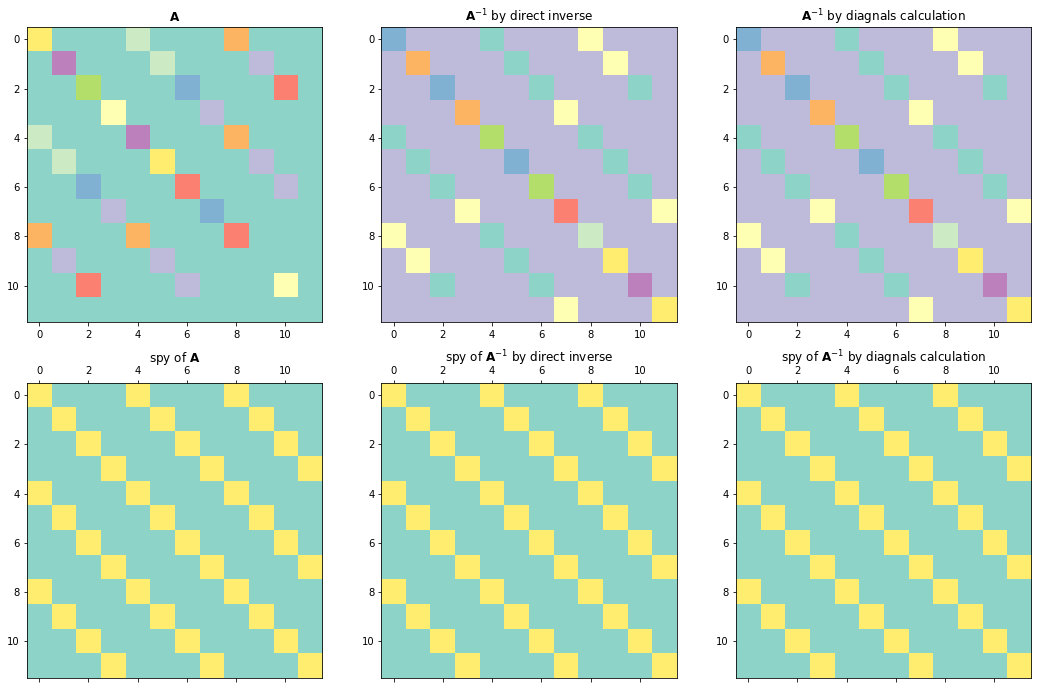

In [4]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (18,12))
cmap = plt.cm.Set3
ax = ax.ravel()
ax[3].spy(A, cmap=cmap)
ax[3].set_title(r'spy of $\mathbf{A}$')
ax[4].spy(A_inv, cmap=cmap)
ax[4].set_title(r'spy of $\mathbf{A}^{-1}$ by direct inverse')
ax[5].spy(a_inv, cmap=cmap)
ax[5].set_title(r'spy of $\mathbf{A}^{-1}$ by diagnals calculation')
ax[0].imshow(A, cmap=cmap)
ax[0].set_title(r'$\mathbf{A}$')
ax[1].imshow(A_inv, cmap=cmap)
ax[1].set_title(r'$\mathbf{A}^{-1}$ by direct inverse')
ax[2].imshow(a_inv, cmap=cmap)
ax[2].set_title(r'$\mathbf{A}^{-1}$ by diagnals calculation')
print ('A_inv == a_inv: ',np.allclose(A_inv, a_inv))

In [5]:
# A view of the number
display(Markdown('$\mathbf{A}^{-1}$ computed with numpy: '))
disp_array([A_inv])
display(Markdown('$\mathbf{A}^{-1}$ computed analytically: '))
disp_array([a_inv])

$\mathbf{A}^{-1}$ computed with numpy: 

$$
    \left[\begin{array}{['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']}
    0.07 & 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  \\ 0.0  & 0.07 & 0.0  & 0.0  & 0.0  & -0.06& 0.0  & 0.0  & 0.0  & -0.02& 0.0  & 0.0  \\ 0.0  & 0.0  & 0.06 & 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & -0.06& 0.0  \\ 0.0  & 0.0  & 0.0  & 0.09 & 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & -0.01\\ -0.05& 0.0  & 0.0  & 0.0  & 0.11 & 0.0  & 0.0  & 0.0  & -0.08& 0.0  & 0.0  & 0.0  \\ -0.0 & -0.06& -0.0 & -0.0 & -0.0 & 0.06 & -0.0 & -0.0 & -0.0 & -0.05& -0.0 & -0.0 \\ 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & 0.13 & 0.0  & 0.0  & 0.0  & -0.08& 0.0  \\ -0.0 & -0.0 & -0.0 & -0.05& -0.0 & -0.0 & -0.0 & 0.04 & -0.0 & -0.0 & -0.0 & -0.05\\ -0.05& 0.0  & 0.0  & 0.0  & -0.08& 0.0  & 0.0  & 0.0  & 0.23 & 0.0  & 0.0  & 0.0  \\ 0.0  & -0.02& 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & 0.28 & 0.0  & 0.0  \\ 0.0  & 0.0  & -0.06& 0.0  & 0.0  & 0.0  & -0.08& 0.0  & 0.0  & 0.0  & 0.21 & 0.0  \\ 0.0  & 0.0  & 0.0  & -0.01& 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & 0.2
    \end{array}\right]
    $$

$\mathbf{A}^{-1}$ computed analytically: 

$$
    \left[\begin{array}{['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']}
    0.07 & 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  \\ 0.0  & 0.07 & 0.0  & 0.0  & 0.0  & -0.06& 0.0  & 0.0  & 0.0  & -0.02& 0.0  & 0.0  \\ 0.0  & 0.0  & 0.06 & 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & -0.06& 0.0  \\ 0.0  & 0.0  & 0.0  & 0.09 & 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & -0.01\\ -0.05& 0.0  & 0.0  & 0.0  & 0.11 & 0.0  & 0.0  & 0.0  & -0.08& 0.0  & 0.0  & 0.0  \\ 0.0  & -0.06& 0.0  & 0.0  & 0.0  & 0.06 & 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  \\ 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & 0.13 & 0.0  & 0.0  & 0.0  & -0.08& 0.0  \\ 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & 0.04 & 0.0  & 0.0  & 0.0  & -0.05\\ -0.05& 0.0  & 0.0  & 0.0  & -0.08& 0.0  & 0.0  & 0.0  & 0.23 & 0.0  & 0.0  & 0.0  \\ 0.0  & -0.02& 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & 0.28 & 0.0  & 0.0  \\ 0.0  & 0.0  & -0.06& 0.0  & 0.0  & 0.0  & -0.08& 0.0  & 0.0  & 0.0  & 0.21 & 0.0  \\ 0.0  & 0.0  & 0.0  & -0.01& 0.0  & 0.0  & 0.0  & -0.05& 0.0  & 0.0  & 0.0  & 0.2
    \end{array}\right]
    $$

From above figure and the comparison of two inversions, we can see that two $\mathbf{A}^{-1}$ are identical, and also we see that  $\mathbf{A}^{-1}$ is also symmetric like $\mathbf{A}$.

Put it in a function with sparse output if $ny$ becomes large:
```python
def Inv_A(k_iso, k_geo, k_vol, C_pi, C_pg, C_pv, C_obs):
    n = len(k_iso)
    a = k_iso * C_obs * k_iso  + C_pi
    b = k_iso * C_obs * k_geo
    c = k_iso * C_obs * k_vol
    d = b
    e = k_geo * C_obs * k_geo + C_pg
    f = k_geo * C_obs * k_vol
    g = c
    h = f
    i = k_vol * C_obs * k_vol + C_pv

    A = e*i - f*h
    E = a*i - c*g
    I = a*e - b*d                                                                                                                                                                                                                   
    D = B = -(d*i - f*g)
    C = G = b*f - c*e
    F = H = - (a*f - c*d)
    det = a*A + b*B + c*C
    m = np.hstack([A/det, E/det, I/det])
    u1 = l1 = np.hstack([B/det, F/det])
    u2 = l2 = C/det
    #r1 = np.hstack([np.diag(A/det), np.diag(D/det), np.diag(G/det)])
    #r2 = np.hstack([np.diag(B/det), np.diag(E/det), np.diag(H/det)])
    #r3 = np.hstack([np.diag(C/det), np.diag(F/det), np.diag(I/det)])
    #a_inv = np.vstack([r1, r2, r3])
    a_inv = scipy.sparse.diags([m, u1, l1, u2, l2], [0, n, -n, 2*n, -2*n])
    return a_inv
```

It is good to see those two kind of inversion are identical, and we now can have a test on the speed of two inversion.

In [6]:
nx, ny = 3, 1000
pi = np.ones(ny)
pg = np.ones(ny)
pv = np.ones(ny)

C_pi  = 1. / (0.1 * np.ones(ny))
C_pg  = 1. / (0.2 * np.ones(ny))
C_pv  = 1. / (0.3 * np.ones(ny))
C_obs = 1. / (0.015 * np.ones(ny))

k_iso, k_geo, k_vol = np.random.rand(ny), np.random.rand(ny), np.random.rand(ny)

def Inv_A(k_iso, k_geo, k_vol, C_pi, C_pg, C_pv, C_obs):
    n = len(k_iso)
    a = k_iso * C_obs * k_iso  + C_pi
    b = k_iso * C_obs * k_geo
    c = k_iso * C_obs * k_vol
    d = b
    e = k_geo * C_obs * k_geo + C_pg
    f = k_geo * C_obs * k_vol
    g = c
    h = f
    i = k_vol * C_obs * k_vol + C_pv

    A = e*i - f*h
    E = a*i - c*g
    I = a*e - b*d                                                                                                                                                                                                                   
    D = B = -(d*i - f*g)
    C = G = b*f - c*e
    F = H = - (a*f - c*d)
    det = a*A + b*B + c*C
    m = np.hstack([A/det, E/det, I/det])
    u1 = l1 = np.hstack([B/det, F/det])
    u2 = l2 = C/det
    #r1 = np.hstack([np.diag(A/det), np.diag(D/det), np.diag(G/det)])
    #r2 = np.hstack([np.diag(B/det), np.diag(E/det), np.diag(H/det)])
    #r3 = np.hstack([np.diag(C/det), np.diag(F/det), np.diag(I/det)])
    #a_inv = np.vstack([r1, r2, r3])
    a_inv = scipy.sparse.diags([m, u1, l1, u2, l2], [0, n, -n, 2*n, -2*n])
    return a_inv

# inverse of obs and prior covariance matrix
C_prior = np.diag(np.hstack([C_pi, C_pg, C_pv]))
K = np.hstack([np.diag(k_iso), np.diag(k_geo), np.diag(k_vol)])
KK = K.T.dot(np.diag(C_obs)).dot(K)
A = KK + scipy.linalg.block_diag(np.diag(C_pi), np.diag(C_pg), np.diag(C_pv))
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import inv
As = csc_matrix(A)
print ('Time of sparse A inverse: ')
%timeit inv(As)
print ('Time of dense A inverse: ')
%timeit np.linalg.inv(A)
print ('Time of analytical inverse: ')
%timeit Inv_A(k_iso, k_geo, k_vol, C_pi, C_pg, C_pv, C_obs)
A_inv = np.linalg.inv(A)
a_inv = Inv_A(k_iso, k_geo, k_vol, C_pi, C_pg, C_pv, C_obs)
np.allclose(A_inv, a_inv.todense())

Time of sparse A inverse: 
2.22 s ± 4.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time of dense A inverse: 
583 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time of analytical inverse: 
142 µs ± 382 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


True

True

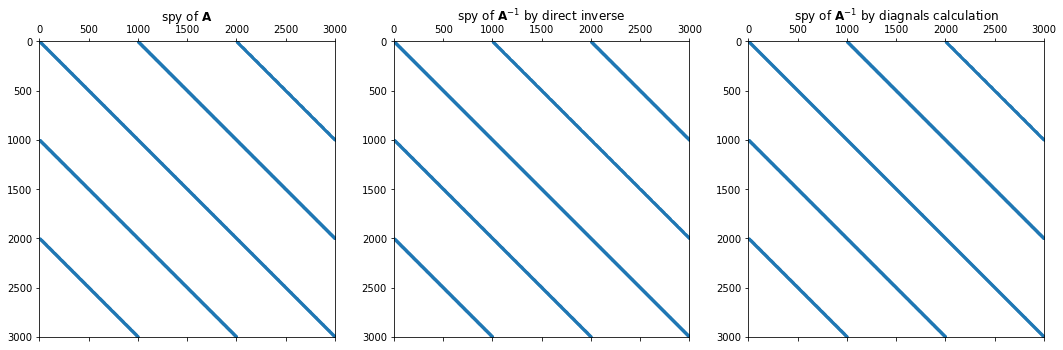

In [7]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (18,6))
cmap = plt.cm.Set1
ax = ax.ravel()
As_inv = inv(As)
ax[0].spy(As, markersize=1)#, cmap=cmap)
ax[0].set_title(r'spy of $\mathbf{A}$')
ax[1].spy(As_inv, markersize=1)#, cmap=cmap)
ax[1].set_title(r'spy of $\mathbf{A}^{-1}$ by direct inverse')
ax[2].spy(a_inv, markersize=1)#, cmap=cmap)
ax[2].set_title(r'spy of $\mathbf{A}^{-1}$ by diagnals calculation')
np.allclose(As_inv.todense(), a_inv.todense())

As we can see from above, the speed of inversion of $\mathbf{A}$ is more than 4000 times faster than the direct inverse and almost $10^4$ times faster if $\mathbf{A}$ is in sparse form, which should be most of the case $ny$ tend to be very large and it dose not fit into memory if we use a dense format. The inversion function can be further optimized, but in this contest the focus is not about the optimization of code, however, if you can make it even faster please do not hesitate try it.

So now we can test with some real data:

In [8]:
f = np.load('fire.npz')
k_iso, k_geo, k_vol = f['iso'], f['geo'], f['vol']
doy = f['doy']
ref = f['refl']
ny = len(k_iso)
K = np.hstack([np.diag(k_iso), np.diag(k_geo), np.diag(k_vol)])
pi = np.ones(len(k_iso)) * 0.25
pg = np.ones(len(k_geo)) * 0.06
pv = np.ones(len(k_vol)) * 0.05

C_pi  = 1. / (0.1 * np.ones(ny))
C_pg  = 1. / (0.05 * np.ones(ny))
C_pv  = 1. / (0.05 * np.ones(ny))
C_obs = 1. / (0.015 * np.ones(ny))

prior = np.hstack([pi, pg, pv])
C_prior = np.diag(np.hstack([C_pi, C_pg, C_pv]))
K  = np.hstack([np.diag(k_iso), np.diag(k_geo), np.diag(k_vol)])
KK = K.T.dot(np.diag(C_obs)).dot(K)
A  = KK + scipy.linalg.block_diag(np.diag(C_pi), np.diag(C_pg), np.diag(C_pv))
b  = K.T.dot(np.diag(C_obs)).dot(ref[:,1]) + C_prior.dot(prior)


A_inv = np.linalg.inv(A)
a_inv = Inv_A(k_iso, k_geo, k_vol, C_pi, C_pg, C_pv, C_obs)
x = A_inv.dot(b)
xx = a_inv.dot(b)
print (np.allclose(x, xx))

True


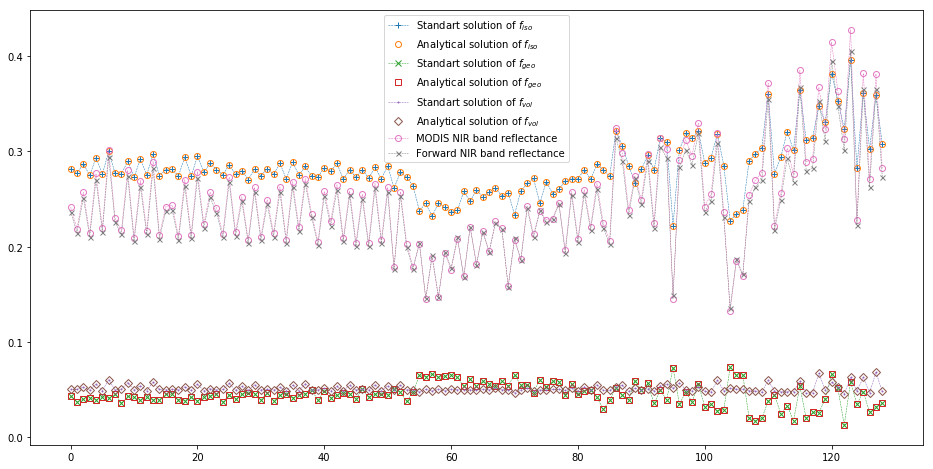

In [9]:
plt.figure(figsize = (16, 8))
plt.plot(x[:ny], '--+', lw=0.5, label = r'Standart solution of $f_{iso}$')
plt.plot(xx[:ny], 'o', mfc = 'none', label = r'Analytical solution of $f_{iso}$')

plt.plot(x[ny:2*ny], '--x', lw=0.5, label = r'Standart solution of $f_{geo}$')
plt.plot(xx[ny:2*ny], 's', mfc = 'none', label = r'Analytical solution of $f_{geo}$')

plt.plot(x[2*ny:], '--o',lw=0.5,  ms = 1, label = r'Standart solution of $f_{vol}$')
plt.plot(xx[2*ny:], 'D', mfc = 'none', label = r'Analytical solution of $f_{vol}$')

plt.plot(ref[:,1], '--o', mfc='none', lw=0.5, label='MODIS NIR band reflectance')
plt.plot(K.dot(xx), '--x', mfc='none', lw=0.5, ms=5, label='Forward NIR band reflectance')

plt.legend()

Now we can also have a check on the influence of changes of prior uncertainty:

In [10]:
import os
if not os.path.exists('images/movie.gif'):
    for i in range(1, 200):
        unc = 0.001 * i
        C_pi  = 1. / (unc * np.ones(ny))
        C_prior = np.diag(np.hstack([C_pi, C_pg, C_pv]))
        K  = np.hstack([np.diag(k_iso), np.diag(k_geo), np.diag(k_vol)])
        KK = K.T.dot(np.diag(C_obs)).dot(K)
        A  = KK + scipy.linalg.block_diag(np.diag(C_pi), np.diag(C_pg), np.diag(C_pv))
        b  = K.T.dot(np.diag(C_obs)).dot(ref[:,1]) + C_prior.dot(prior)
        a_inv = Inv_A(k_iso, k_geo, k_vol, C_pi, C_pg, C_pv, C_obs)
        xx = a_inv.dot(b)
        plt.figure(figsize = (16, 8))
        plt.plot(xx[:ny], '--+', mfc = 'none', lw=0.5, label = r'$f_{iso}$ solved with $C_{prior{iso}} = %.03f$'%unc)
        plt.plot(xx[ny:2*ny], '--o', mfc = 'none', lw=0.5, ms=1, label = r'$f_{iso}$ solved with $C_{prior{geo}} = %.03f$'%0.05)
        plt.plot(xx[2*ny:], '--x', mfc = 'none', lw=0.5,ms=2, label = r'$f_{iso}$ solved with $C_{prior{vol}} = %.03f$'%0.05)

        plt.plot(K.dot(xx), '--x', mfc='none', lw=0.5, ms=5, label='Forward NIR band reflectance')
        plt.plot(ref[:,1], '--o', mfc='none', lw=0.5, label='MODIS NIR band reflectance')
        plt.ylim(0, 0.5)
        plt.legend()
        plt.savefig('images/f_iso_%.03f.png'%unc)
        plt.close()
    #turn it into a gif
    import imageio
    from glob import glob
    images = []
    filenames = sorted(glob('images/f_iso_0.???.png'))
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('images/movie.gif', images)

![](./images/movie.gif)

By changing the uncertainty we can see that the solved $\mathbf{f_*}$ so as to the changing of forward modeled surface reflectance. Since we assume the same $\mathbf{f_*}$ across the whole year, we should have a fairly large uncertainty, which means solutions above with a larger uncertainty values should be more realistic. Before doy 55 the changes in the reflectance are mainly due to the solar and viewing geometry from the periodic phenomena of them, so the solved $\mathbf{f_*}$ should be pretty stable. But with a large uncertainty we tend to have noises from the observations or the solution is too localised (like a lot of results from the machine learning methods used these days with very high accurace for a set of data but being unable to be used with another dataset). Generally we can simply run a low pass filter (smoothing filter) to get ride of the unwanted noise effects in the retrieved $\mathbf{f_*}$. However, we can add a temporal constrain to this system and solve it with the prior and observation at the same time to also being able to filter out those noises, which leading us to the temporal and/or spatial constrain mentioned before.

### $D^{\top}D$ and $\mathbf{\mathbf{DCT}}$

In this section, I will first have a look at the connection between $\mathbf{D}^{\top}\mathbf{D}$ and $\mathbf{\mathbf{DCT}}$, and then try to use it in a way to save the expensive computation of inversion. Firstly, we have a look at $\mathbf{D}^{\top}\mathbf{D}$ eigendecomposition:


$$
\mathbf{D}^{\top}\mathbf{D} = \mathbf{Q} \mathbf{\lambda} \mathbf{Q}^{-1}
$$ 


Because our $\mathbf{D}^{\top}\mathbf{D}$ is a real symmetric square matrix, so its eigenvectors $\mathbf{Q}$ can be chosen to orthognal to each other, then $\mathbf{Q}^{-1} =  \mathbf{Q}^{\top}$. Also, the spectial property of our $\mathbf{D}^{\top}\mathbf{D}$ is that $(\mathbf{D}^{\top}\mathbf{D})(\mathbf{D}^{\top}\mathbf{D})^{\top} = (\mathbf{D}^{\top}\mathbf{D})^{\top}(\mathbf{D}^{\top}\mathbf{D})$, which means its eigenvectors formming a unitary matrix. Actually, a unitary matrix already guarantees that its inverse equals its transpose. According to [Gilbert Strang](http://www-math.mit.edu/~gs/papers/dct.pdf), different type of $\mathbf{\mathbf{DCT}}$ form the eigenvectors of second difference matrix $\mathbf{D}^{\top}\mathbf{D}$ with different kind of boundary rows (first and last row).  For the $\mathbf{D}^{\top}\mathbf{D}$ we mentioned before, its eigenvectors correspond type-II $\mathbf{\mathbf{DCT}}$ with the componets $\cos((j+\frac{1}{2})\frac{k\pi}{N-1})$, with the eigenvalues are $\lambda_k$ = $2 - 2\cos(\frac{k}{n}\pi)$, where $k = 0, 1, 2, ..., n-1$. 

In [11]:
import scipy
import pylab as plt
import numpy as np
from scipy import sparse, linalg
from scipy.fftpack import dct, idct


# define a function compose DTD matrix
# since there are nx types parameters
# with length of ny so the final DTD 
# matrix should be nx * ny by  nx * ny
def compose_dtd(nx, ny):
    ns = nx*ny                                                              
    n = int(np.sqrt(ns))
    d1 = 2 * np.ones(ns)
    d1[ny-1::ny] = 1
    d1[0::ny] = 1
    d2 = np.ones(ns) * -1
    d2[ny-1::ny] = 0
    d3 = 2 * np.ones(ns)
    d3[:ny] = 1
    d3[ns-ny:] = 1
    d4 = np.ones(ns) * -1
    dtdx = scipy.sparse.spdiags([d1, d2[::-1], d2], [0, 1, -1], ns, ns)                                                                                                                      
    dtdy = scipy.sparse.spdiags([d3, d4, d4], [0, ny, -ny], ns, ns)
    dtd = dtdx + dtdy
    return dtd, dtdx, dtdy
nx, ny = 1, 5
dtd, dtdx, dtdy = compose_dtd(nx, ny)
dtd = dtdx.todense()
#dtd = dtd[:ny,:ny]

Firstly, I compose $\mathbf{D}^{\top}\mathbf{D}$ matrix for single parameters with length of 5, then we can check above equation of $\mathbf{D}^{\top}\mathbf{D}$ is a product of eigenvectors and a diagnal eigenvalues matrix.

dtd == _dtd:  True


$$
    \left[\begin{array}{['c', 'c', 'c', 'c', 'c']}
    1    & -1   & 0    & 0    & 0    \\ -1   & 2    & -1   & 0    & 0    \\ 0    & -1   & 2    & -1   & 0    \\ 0    & 0    & -1   & 2    & -1   \\ 0    & 0    & 0    & -1   & 1  
    \end{array}\right]
    $$

$$
    \left[\begin{array}{['c', 'c', 'c', 'c', 'c']}
    1    & -1   & 0    & 0    & 0    \\ -1   & 2    & -1   & 0    & 0    \\ 0    & -1   & 2    & -1   & 0    \\ 0    & 0    & -1   & 2    & -1   \\ 0    & 0    & 0    & -1   & 1  
    \end{array}\right]
    $$

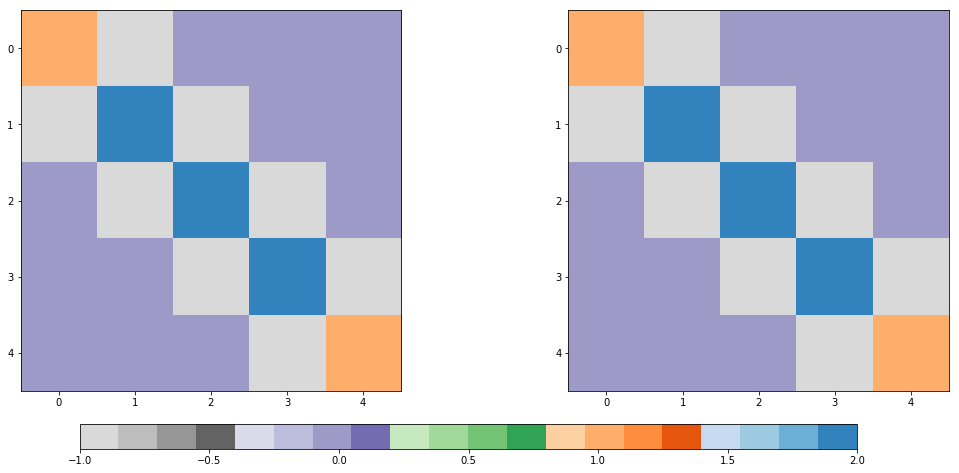

In [12]:
Q = dct(np.identity(ny), norm='ortho') # the eigenvectors by DCT(I)
v = 2 - 2*np.cos(np.arange(ny)*np.pi/ny) # the eigenvalues
Q_T = Q.T
_dtd = Q.dot(np.diag(v)).dot(Q_T)
print('dtd == _dtd: ', np.allclose(_dtd, dtd))
disp_array([np.array(dtd).astype(int)])
disp_array([np.array(_dtd).astype(int)])
fig, ax = plt.subplots(figsize=(18,7), nrows=1, ncols=2)
im1 = ax[0].imshow(dtd, cmap=plt.cm.tab20c_r)
#cb1 = plt.colorbar(im1)
im2 = ax[1].imshow(_dtd, cmap=plt.cm.tab20c_r)
#cb2 = plt.colorbar(im2)
cbar_ax = fig.add_axes([0.2, 0.01, 0.6, 0.05])
fig.colorbar(im2, cax=cbar_ax, orientation='horizontal')

Since in our case, we have three types of parameters, the $\mathbf{D}^{\top}\mathbf{D}$ is a compostion of three **small** $ny$ by $ny$ $\mathbf{d}^{\top}\mathbf{d}$ in the block dignals of the **BIG** $nx\times ny$ by $nx\times ny$ $\mathbf{D}^{\top}\mathbf{D}$ matrix for $\mathbf{x} = [\mathbf{f_{iso}}, \mathbf{f_{geo}}, \mathbf{f_{vol}}]^{\top}$:


$$
\mathbf{D}^{\top}\mathbf{D} =
\left|\begin{array}{ccc}
\mathbf{d}^{\top}\mathbf{d} & \mathbf{0} &  \mathbf{0}\\
\mathbf{0}  &\mathbf{d}^{\top}\mathbf{d} &  \mathbf{0}\\
\mathbf{0} & \mathbf{0} & \mathbf{d}^{\top}\mathbf{d}  
\end{array}\right|
=  
\left|\begin{array}{ccc}
\mathbf{Q} \mathbf{\lambda_1} \mathbf{Q}^{\top} & \mathbf{0} & \mathbf{0} \\
\mathbf{0}  &\mathbf{Q} \mathbf{\lambda_2} \mathbf{Q}^{\top} &  \mathbf{0} \\
\mathbf{0}  &\mathbf{0} & \mathbf{Q} \mathbf{\lambda_3} \mathbf{Q}^{\top}  
\end{array}\right|
=
\left|\begin{array}{ccc}
\mathbf{Q} & \mathbf{0}  & \mathbf{0}\\
\mathbf{0}  &\mathbf{Q}  & \mathbf{0}\\ 
\mathbf{0} & \mathbf{0}  & \mathbf{Q}  
\end{array}\right|
\bullet
\left|\begin{array}{ccc}
\mathbf{\lambda_1} & \mathbf{0} &  \mathbf{0}\\
\mathbf{0}  &\mathbf{\lambda_2} &   \mathbf{0}\\
\mathbf{0} & \mathbf{0} & \mathbf{\lambda_3}
\end{array}\right|
\bullet
\left|\begin{array}{ccc}
\mathbf{Q}^{\top} & \mathbf{0} & \mathbf{0}\\
\mathbf{0}  &\mathbf{Q}^{\top} &  \mathbf{0} \\
\mathbf{0} & \mathbf{0} & \mathbf{Q}^{\top}  
\end{array}\right|
$$


And actually 

$$
\left|\begin{array}{ccc}
\mathbf{Q}^{\top} & \mathbf{0} & \mathbf{0}\\
\mathbf{0}  &\mathbf{Q}^{\top} &  \mathbf{0} \\
\mathbf{0} & \mathbf{0} & \mathbf{Q}^{\top}  
\end{array}\right|
=
\left|\begin{array}{ccc}
\mathbf{Q} & \mathbf{0}  & \mathbf{0}\\
\mathbf{0}  &\mathbf{Q}  & \mathbf{0}\\ 
\mathbf{0} & \mathbf{0}  & \mathbf{Q}  
\end{array}\right|^{\top}
$$


And if we let 
$
\mathbf{U} = 
\left|\begin{array}{ccc}
\mathbf{Q} & \mathbf{0}  & \mathbf{0}\\
\mathbf{0}  &\mathbf{Q}  & \mathbf{0}\\ 
\mathbf{0} & \mathbf{0}  & \mathbf{Q}  
\end{array}\right|$, and $\mathbf{\Lambda} = 
\left|\begin{array}{ccc}
\mathbf{\lambda_1} & \mathbf{0} &  \mathbf{0}\\
\mathbf{0}  &\mathbf{\lambda_2} &   \mathbf{0}\\
\mathbf{0} & \mathbf{0} & \mathbf{\lambda_3}
\end{array}\right|
$.


Then 
$
\mathbf{D}^{\top}\mathbf{D} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^{\top}
$. And actually our $\mathbf{U}$ is still a unitary matrix, which means $\mathbf{U}^{-1} = \mathbf{U}^{\top}$.


So the inverse of $\mathbf{I} +  \mathbf{D}^{\top}\mathbf{D}$:

$$
\mathbf{I} + \mathbf{D}^{\top}\mathbf{D} = (\mathbf{U}^{\top})^{-1}(1 + \mathbf{\Lambda})^{-1}\mathbf{U}^{-1} = \mathbf{U}(1 + \mathbf{\Lambda})^{-1}\mathbf{U}^{\top}
$$


True


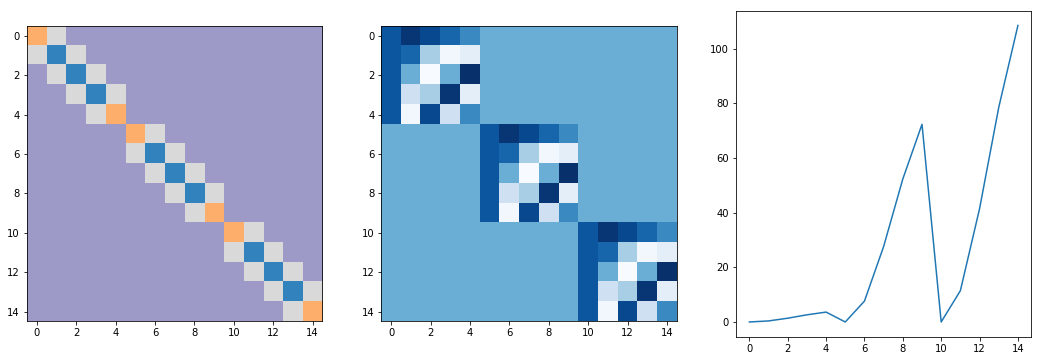

In [13]:
dtd = compose_dtd(3, 5)[1].todense()
#disp_array([np.array(dtd)])

lamb_1, lamb_2, lamb_3 = 1, 20, 30
# dtd unit 
udtd = dtd[:ny, :ny]
# compute unit dct eigenvector 
s = dct(np.diag(np.ones(ny)), norm='ortho')
# compute eigenvalue
v = 2 - 2*np.cos(np.arange(ny)*np.pi/ny)
# right dct eigenvector is the transposed
# unit dct eigenvector 
d = s.T
# compose block dct eigenvector
bs = scipy.linalg.block_diag(s,s,s)
# compose block dct eigenvalue
bv = np.hstack([lamb_1 * v, lamb_2 * v, lamb_3 * v])
# transpose get the right part 
bd = bs.T              
# block DTD come from dot products
bdtd = bs.dot(np.diag(bv)).dot(bd)
# the original DTD matrix
_bdtd = scipy.linalg.block_diag(lamb_1 * udtd, lamb_2 * udtd, lamb_3 * udtd)
fig, ax = plt.subplots(figsize=(18, 6), ncols=3, nrows=1)
ax[0].imshow(dtd, cmap=plt.cm.tab20c_r)
ax[1].imshow(bs, cmap=plt.cm.Blues)
ax[2].plot(bv)
print (np.allclose(bdtd, _bdtd))

In [14]:
# compose a basis dtd
udtd = compose_dtd(1, ny)[1].todense()
# compose the full dtd
I_dtd = lamb_1 * udtd + np.identity(ny), lamb_2 * udtd + np.identity(ny), lamb_3 * udtd + np.identity(ny)
I_dtd = scipy.linalg.block_diag(*I_dtd)

# the eigenvalues
lamb_dtd = 2 - 2*np.cos(np.arange(ny)*np.pi/ny)
# inverse of eigenvalues
fv = lambda lamb: 1./(1. + lamb*lamb_dtd)
#the eigenvector of one dtd
s = dct(np.diag(np.ones(ny)), norm='ortho')
d = s.T
# inverse of fill I + DTD by matrix products
_inv_I_dtd = scipy.linalg.block_diag((s*fv(lamb_1)).dot(d), (s*fv(lamb_2)).dot(d), (s*fv(lamb_3)).dot(d))
# a direct inverse
inv_I_dtd = np.linalg.inv(I_dtd)

print (np.allclose(inv_I_dtd, _inv_I_dtd))

True


Coming back to the temporal and/or sptatial constrain, the equation for temporal or spatial constrain is basically we assume the changes between the closing elements are zeros:

$$
\gamma^{2}\mathbf{D}^{\top}\mathbf{D}\mathbf{x} = 0
$$


where the $\gamma$ term express the smoothness term controlling the amount of smoothing we expected for the solution. So we add previous equations, it becomes:

So our problem becomes how to solve:


$$
\begin{array}{c}
\left(\mathbf{A} + \gamma^{2}\mathbf{D}^{\top}\mathbf{D}\right)\mathbf{x} = \mathbf{b}\\
(\mathbf{I} +  \gamma^{2}\mathbf{D}^{\top}\mathbf{D})\mathbf{x} = \mathbf{b} - \mathbf{Ax} + \mathbf{x}\\
(\mathbf{I} +  \gamma^{2}\mathbf{D}^{\top}\mathbf{D})\mathbf{x} = (\mathbf{I} +  \gamma^{2}\mathbf{D}^{\top}\mathbf{D} - \mathbf{A} - \gamma^{2}\mathbf{D}^{\top}\mathbf{D})\mathbf{x} + \mathbf{b}\\
(\mathbf{I} +  \gamma^{2}\mathbf{D}^{\top}\mathbf{D})\mathbf{x} = \left[(\mathbf{I} +  \gamma^{2}\mathbf{D}^{\top}\mathbf{D}) - (\mathbf{A} + \gamma^{2}\mathbf{D}^{\top}\mathbf{D})\right]\mathbf{x} + \mathbf{b}\\
\mathbf{x} = (\mathbf{I} +  \gamma^{2}\mathbf{D}^{\top}\mathbf{D})^{-1}\left[\mathbf{b} - (\mathbf{A} + \gamma^{2}\mathbf{D}^{\top}\mathbf{D})\mathbf{x}\right] + \mathbf{x}
\end{array}
$$


And this forms a iterative solving for this problem with out preconditioner is $(\mathbf{I} +  \gamma^{2}\mathbf{D}^{\top}\mathbf{D})^{-1} =  \mathbf{U}(1 + \mathbf{\Lambda})^{-1}\mathbf{U}^{\top}$, then,


$$
\mathbf{x} =  \mathbf{U}(1 + \mathbf{\Lambda})^{-1}\mathbf{U}^{\top}\left[\mathbf{b} - (\mathbf{A} + \gamma^{2}\mathbf{D}^{\top}\mathbf{D})\mathbf{x}\right] + \mathbf{x}
$$


And the meaning of this iterative method essentially is our solution to this system is a smoothing of error line (surface) of previous solution. The choice of the starting point $\mathbf{x_0}$ would be the smoothed version of the solved results from $\mathbf{A}\mathbf{x} = b$ system, which is easy to compute and also the smoothing process should be closer to the final solution.

Now we putting previous section together and using equations above to see what we can get out from that:

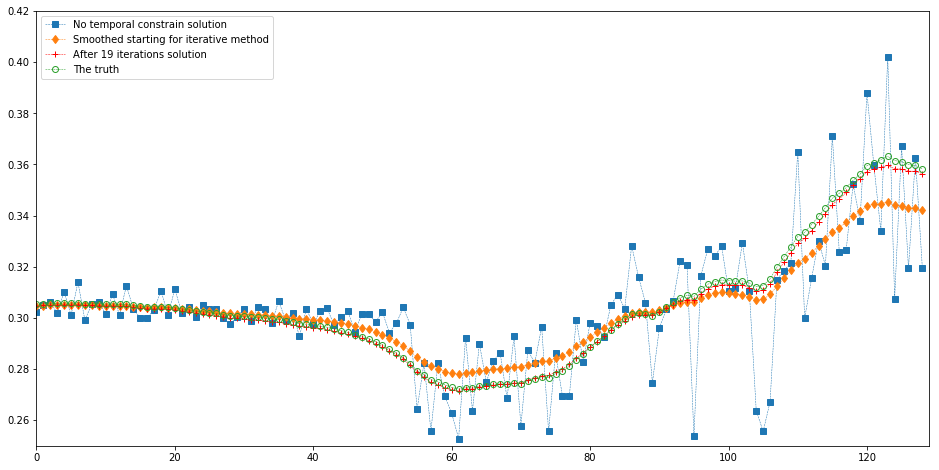

In [226]:
f = np.load('fire.npz')
k_iso, k_geo, k_vol = f['iso'], f['geo'], f['vol']
doy = f['doy']
ref = f['refl']
ny = len(k_iso)
K = np.hstack([np.diag(k_iso), np.diag(k_geo), np.diag(k_vol)])
pi = np.ones(len(k_iso)) * 0.3
pg = np.ones(len(k_geo)) * 0.06
pv = np.ones(len(k_vol)) * 0.05

C_pi  = 1. / (0.1 * np.ones(ny))
C_pg  = 1. / (0.1 * np.ones(ny))
C_pv  = 1. / (0.1 * np.ones(ny))
C_obs = 1. / (0.015 * np.ones(ny))

prior = np.hstack([pi, pg, pv])
C_prior = np.diag(np.hstack([C_pi, C_pg, C_pv]))
K  = np.hstack([np.diag(k_iso), np.diag(k_geo), np.diag(k_vol)])
KK = K.T.dot(np.diag(C_obs)).dot(K)
A  = KK + scipy.linalg.block_diag(np.diag(C_pi), np.diag(C_pg), np.diag(C_pv))
b  = K.T.dot(np.diag(C_obs)).dot(ref[:,1]) + C_prior.dot(prior)


# without temporal constrain

A_inv = np.linalg.inv(A)
a_inv = Inv_A(k_iso, k_geo, k_vol, C_pi, C_pg, C_pv, C_obs)
x = A_inv.dot(b)
xx = a_inv.dot(b)

# the temporal constrain dtd

lamb_1, lamb_2, lamb_3 = 1000, 20, 30
ny = len(k_iso)
lamb_dtd = 2 - 2*np.cos(np.arange(ny)*np.pi/ny)
fv = lambda lamb: 1./(1. + lamb*lamb_dtd)

# the truth

udtd = compose_dtd(1, ny)[1].todense()
dtd = scipy.linalg.block_diag(lamb_1 * udtd, lamb_2 * udtd, lamb_3 * udtd)
x_real = np.linalg.inv(A + dtd).dot(b)

# different gamma for different parameters

gamma_1 =  fv(lamb_1)
gamma_2 =  fv(lamb_2)
gamma_3 =  fv(lamb_3)

# a smoothed starting point

x0 = np.hstack([idct(fv(np.sqrt(lamb_1))*dct(xx[:ny],     norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_2))*dct(xx[ny:2*ny], norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_3))*dct(xx[2*ny:],   norm = 'ortho'),  norm = 'ortho')])
st = x0.copy()
n=20
for i in range(n):
    rough_error  = (b - (A+dtd).dot(x0))/(A+dtd).max() * 20. # somehow we need to normalise the error
                                                             # a multiplier seems helps as well but do not
                                                             # try too large...
    smooth_error = [idct(gamma_1 * dct(rough_error[:ny], norm='ortho'), norm='ortho'), \
              idct(gamma_2 * dct(rough_error[ny:2*ny],   norm='ortho'), norm='ortho'), \
              idct(gamma_3 * dct(rough_error[2*ny:3*ny], norm='ortho'), norm='ortho')]  
    x0 += np.array(smooth_error).ravel()
    #plt.plot(x0[:129]-x_real[:129])
plt.figure(figsize=(16,8))
plt.plot(xx[:129],'s--', lw=0.5, label = 'No temporal constrain solution')
plt.plot(st[:129], 'd--', lw=0.5, label = 'Smoothed starting for iterative method')
plt.plot(x0[:129], 'r+--', lw=0.5, label = 'After %d iterations solution'%i)
plt.plot(x_real[:129], 'o--', mfc = 'none',lw=0.5,label = 'The truth')
plt.xlim(0, 129)
plt.ylim(0.25, 0.42)
plt.legend()

From the above, we can see that after 200 iterations, the solution is already very close to the truth. It is interesting to see that the smoothed version of no temporal constrain solution is away from the truth in places where the changes happenning very fast but very close to the truth when it is stable, which means we can use a smoothing directly when there is no such big changes but it will give us bad solution when there is a change particularly when there is step like change. 



To sum up, to solve a system with observation, prior and temporal or spatial constrain, we can first derive a staring point with only observation and prior without cross correlation between different types parameters and using the smoothed version of that solution as our starting point of ierative method. The iterative method basically updating previous solution with the smoothed errors (normalised...).

In [227]:
x0 = np.hstack([idct(fv(np.sqrt(lamb_1))*dct(xx[:ny],     norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_2))*dct(xx[ny:2*ny], norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_3))*dct(xx[2*ny:],   norm = 'ortho'),  norm = 'ortho')])

st = np.hstack([idct(fv(np.sqrt(lamb_1))*dct(xx[:ny],  norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_2))*dct(xx[ny:2*ny],  norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_3))*dct(xx[2*ny:],  norm = 'ortho'),  norm = 'ortho')])

if not os.path.exists('images/itera.gif'):
    n=200
    for i in range(n):
        rough_error  = (b - (A+dtd).dot(x0))/(A+dtd).max() # somehow we need to normalise the error
        smooth_error = [idct(gamma_1 * dct(rough_error[:ny],       norm='ortho'), norm='ortho'), \
                  idct(gamma_2 * dct(rough_error[ny:2*ny],   norm='ortho'), norm='ortho'), \
                  idct(gamma_3 * dct(rough_error[2*ny:3*ny], norm='ortho'), norm='ortho')]  
        x0 += np.array(smooth_error).ravel()
        plt.figure(figsize=(16,8))
        plt.plot(xx[:ny],'s--', lw=0.5, label = 'No temporal constrain solution')
        plt.plot(st[:ny], 'd--', lw=0.5, label = 'Smoothed starting for iterative method')
        plt.plot(x0[:ny], 'r+--', lw=0.5, label = 'After %d iterations solution'%i)
        plt.plot(x_real[:ny], 'o--', mfc = 'none',lw=0.5,label = 'The truth')
        plt.xlim(0, ny)
        plt.ylim(0.25, 0.42)
        plt.legend()
        plt.savefig('images/iterative_%03d.png'%i)
        plt.close()
    import imageio
    from glob import glob
    images = []
    filenames = sorted(glob('images/iterative_???.png'))
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('images/itera.gif', images)

![](images/itera.gif)

From the movie of each iteration, we can see that the iterative method can go very fast to the true solution in a general trend after about $30$ iterations, but it need to around $100$ iteration to get fairly close to the exact solution. But considering when our $\mathbf{A}$ matrix becomes larger so as to $\mathbf{D}^{\top}\mathbf{D}$, a direct inverse is almost too expensive and this iterative method should still being able to run very efficiently, as the whole iterative method is doing dot products and $DCT$ should further reduce the operations. Definitely, we can use other tricks in the iterative method to futher reduce the iterations, such as multigrid methods, but I stopped here because that is a little too far from this content.

After some diggings....The normalising is actually the choice of right step size for the updating of our previous solution, which is given by:

$$
\alpha = \frac{\mathbf{r}^{\top}\mathbf{r}}{\mathbf{r}^{\top}\mathbf{A}\mathbf{r}} 
$$

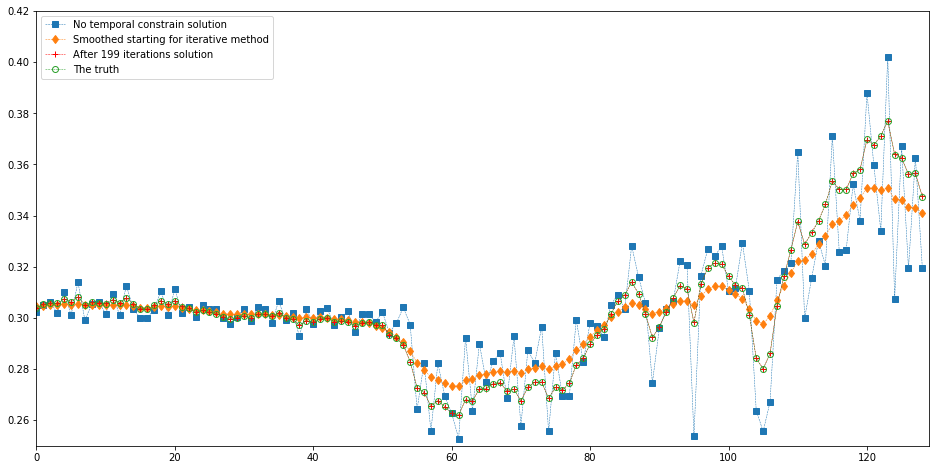

In [228]:
lamb_1, lamb_2, lamb_3 = 100, 20, 30
ny = len(k_iso)
lamb_dtd = 2 - 2*np.cos(np.arange(ny)*np.pi/ny)
fv = lambda lamb: 1./(1. + lamb*lamb_dtd)

# the truth

udtd = compose_dtd(1, ny)[1].todense()
dtd = scipy.linalg.block_diag(lamb_1 * udtd, lamb_2 * udtd, lamb_3 * udtd)
x_real = np.linalg.inv(A + dtd).dot(b)

# different gamma for different parameters

gamma_1 =  fv(lamb_1)
gamma_2 =  fv(lamb_2)
gamma_3 =  fv(lamb_3)

# a smoothed starting point

x0 = np.hstack([idct(fv(np.sqrt(lamb_1))*dct(xx[:ny],     norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_2))*dct(xx[ny:2*ny], norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_3))*dct(xx[2*ny:],   norm = 'ortho'),  norm = 'ortho')])
st = x0.copy()


n=200
sdu = []
for i in range(n):
    rough_error  = (b - (A+dtd).dot(x0))#/(A+dtd).max() # no more multiplicaiton...
    smooth_error = [idct(gamma_1 * dct(rough_error[:ny],       norm='ortho'), norm='ortho'), \
                    idct(gamma_2 * dct(rough_error[ny:2*ny],   norm='ortho'), norm='ortho'), \
                    idct(gamma_3 * dct(rough_error[2*ny:3*ny], norm='ortho'), norm='ortho')]  
    smooth_error =  np.matrix(np.array(smooth_error).ravel()).T
    alpha  = np.array(smooth_error.T.dot(smooth_error)/(smooth_error.T.dot(A+dtd).dot(smooth_error))).ravel()
    #alphas.append(alpha)
    x0     += alpha * np.array(smooth_error).ravel()
    sdu.append(np.array(x0).ravel()-x_real)
plt.figure(figsize=(16,8))
plt.plot(xx[:ny],'s--', lw=0.5, label = 'No temporal constrain solution')
plt.plot(st[:ny], 'd--', lw=0.5, label = 'Smoothed starting for iterative method')
plt.plot(x0[:ny], 'r+--', lw=0.5, label = 'After %d iterations solution'%i)
plt.plot(x_real[:ny], 'o--', mfc = 'none',lw=0.5,label = 'The truth')
plt.xlim(0, ny)
plt.ylim(0.25, 0.42)
plt.legend()

Actually, this is called the [steepest descent method](https://en.wikipedia.org/wiki/Gradient_descent) with every update is the optimal step size in that direction. However, it may not be the optimal direction, and it means there would be a better choice of update in each iteration. Because our $\mathbf{A} + \mathbf{D}^{\top}\mathbf{D}$ is  symmetric and positive-definite, and a good choice of updating would be [conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method), which updates the solution in a conjugate direction of previous updates and should avoid the zigzag trajectoty of steepest descent method to need fewer steps to the optimal solution...

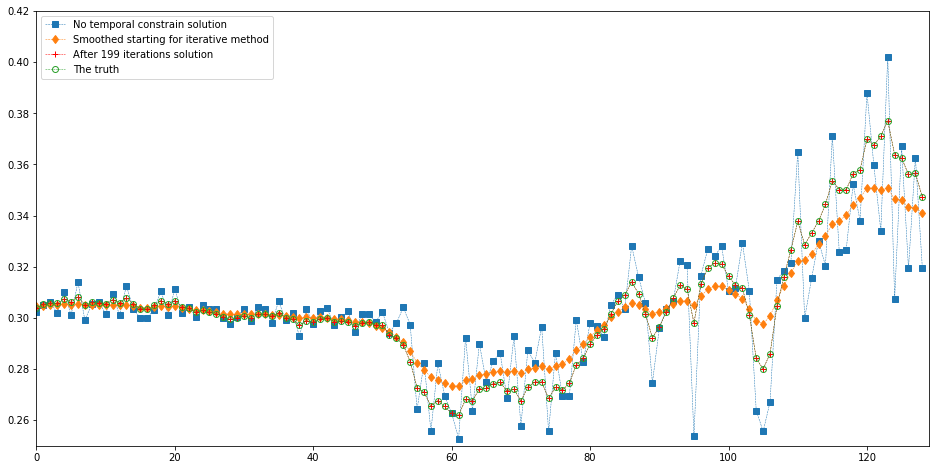

In [229]:
x0 = np.hstack([idct(fv(np.sqrt(lamb_1))*dct(xx[:ny],     norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_2))*dct(xx[ny:2*ny], norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_3))*dct(xx[2*ny:],   norm = 'ortho'),  norm = 'ortho')])
x0 = np.matrix(x0).T
st = x0.copy()
b0 = np.matrix(b).T



def do_dct(r):
    r = np.array(r).ravel() 
    r= [idct(gamma_1 * dct(r[:ny],       norm='ortho'), norm='ortho'), \
        idct(gamma_2 * dct(r[ny:2*ny],   norm='ortho'), norm='ortho'), \
        idct(gamma_3 * dct(r[2*ny:3*ny], norm='ortho'), norm='ortho')] 
    return np.matrix(np.array(r).ravel()).T

pr = None
pz = None
cgu = []
for i in range(n):
    if i==0:
        r = (b0 - (A+dtd).dot(x0))
        z = do_dct(r)
        z = np.matrix(np.array(z).ravel()).T
        p = z
        
    alpha  = r.T.dot(z)/(p.T.dot(A+dtd).dot(p))
    alphas.append(alpha)
    x0  += p.dot(alpha) 
    pr = r.copy()
    pz = z.copy()
    r   -= (A+dtd).dot(p) * alpha
    z    = do_dct(r)
    beta = z.T.dot(r)/pz.T.dot(pr)
    p = z + p.dot(beta)
    cgu.append(np.array(x0).ravel()-x_real)
    
plt.figure(figsize=(16,8))
plt.plot(xx[:ny],'s--', lw=0.5, label = 'No temporal constrain solution')
plt.plot(st[:ny], 'd--', lw=0.5, label = 'Smoothed starting for iterative method')
plt.plot(x0[:ny], 'r+--', lw=0.5, label = 'After %d iterations solution'%i)
plt.plot(x_real[:ny], 'o--', mfc = 'none',lw=0.5,label = 'The truth')
plt.xlim(0, ny)
plt.ylim(0.25, 0.42)
plt.legend()

In [230]:
cgu = np.array(cgu)
sdu = np.array(sdu)
if not os.path.exists('images/trajectory.gif'):
    for i in range(n):
        plt.figure(figsize = (16,8))
        plt.plot(cgu[:i,60], 'r--', lw=1, label = 'Conjugate gradient trajectory')
        plt.plot(sdu[:i,60], 'b--',mfc='None',ms = 5, lw=1, label = 'Steepest descent trajectory')
        plt.plot(i, cgu[i,60], 'ro', mfc='None',ms = 5, label = 'Conjugate gradient')
        plt.plot(i, sdu[i,60], 'b>', mfc='None',ms = 5, label = 'Steepest descent')
        #plt.plot(cgu[:,100])
        #plt.plot(sdu[:,100])
        plt.plot([0,200], [0, 0], 'g--', lw=1)
        plt.xlim(-1, 201)
        plt.ylim(-0.005, 0.012)
        plt.legend()
        plt.savefig('images/trajectory_%03d.png'%i)
        plt.close()
    import imageio
    from glob import glob
    images = []
    filenames = sorted(glob('images/trajectory_???.png'))
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('images/trajectory.gif', images)

![](images/trajectory.gif)

As we can see from the above movie of the trajectory of two methods, conjugate gradient method only needs around 20 iterations to get the exact solution while the steepest descent method needs almost 200 steps to get the exact solution.

Text(0.5,1,'$\\mathbf{f_{vol}}$')

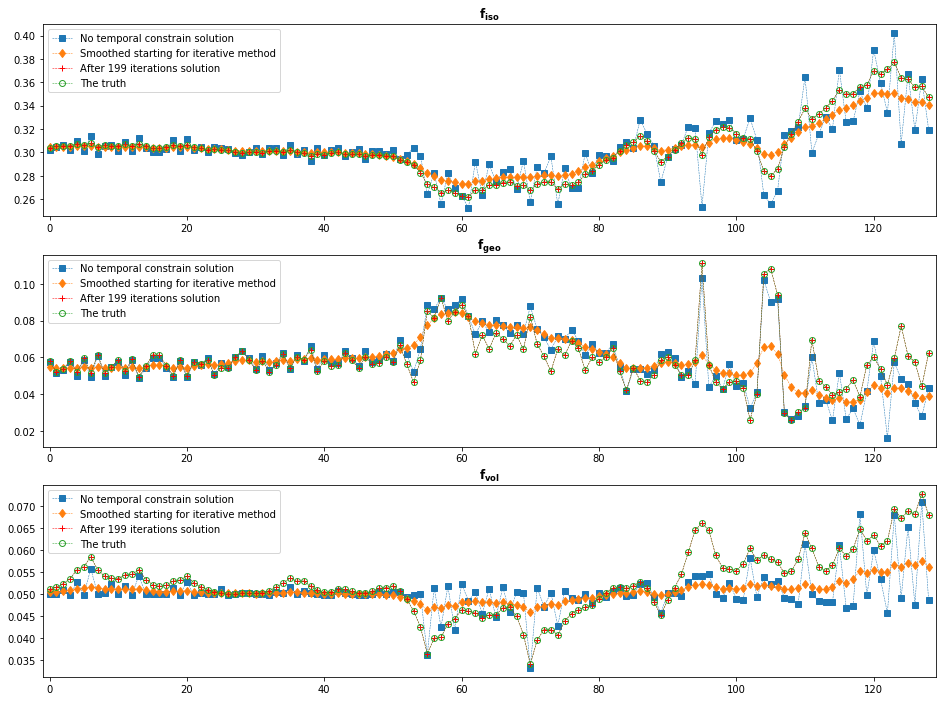

In [231]:
fig, ax = plt.subplots(ncols=1, nrows = 3, figsize=(16,12))
ax[0].plot(xx[:ny],'s--', lw=0.5, label = 'No temporal constrain solution')
ax[0].plot(st[:ny], 'd--', lw=0.5, label = 'Smoothed starting for iterative method')
ax[0].plot(x0[:ny], 'r+--', lw=0.5, label = 'After %d iterations solution'%i)
ax[0].plot(x_real[:ny], 'o--', mfc = 'none',lw=0.5,label = 'The truth')
ax[0].legend()
ax[0].set_title(r'$\mathbf{f_{iso}}$')
ax[1].plot(xx[ny:2*ny],'s--', lw=0.5, label = 'No temporal constrain solution')
ax[1].plot(st[ny:2*ny], 'd--', lw=0.5, label = 'Smoothed starting for iterative method')
ax[1].plot(x0[ny:2*ny], 'r+--', lw=0.5, label = 'After %d iterations solution'%i)
ax[1].plot(x_real[ny:2*ny], 'o--', mfc = 'none',lw=0.5,label = 'The truth')
ax[1].legend()
ax[1].set_title(r'$\mathbf{f_{geo}}$')
ax[2].plot(xx[2*ny:],'s--', lw=0.5, label = 'No temporal constrain solution')
ax[2].plot(st[2*ny:], 'd--', lw=0.5, label = 'Smoothed starting for iterative method')
ax[2].plot(x0[2*ny:], 'r+--', lw=0.5, label = 'After %d iterations solution'%i)
ax[2].plot(x_real[2*ny:], 'o--', mfc = 'none',lw=0.5,label = 'The truth')
ax[0].set_xlim(-1, ny)
ax[1].set_xlim(-1, ny)
ax[2].set_xlim(-1, ny)
ax[2].legend()
ax[2].set_title(r'$\mathbf{f_{vol}}$')

With different $\gamma$ values for different type kernels, we can have different expectations for the temporal constrain for them. It is also possible to introduce the optimal smoothness for this linear system by generalized cross validation (GCV) method and the optimal smoothness for a linear system is solved by minimising the [GCV score](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4008475/):

$$
GCV(s) = \frac{\frac{RSS}{n}}{\left[1-\frac{Tr(\mathbf{H})}{n}\right]^2}
$$

Where $\mathbf{H} = (\mathbf{I} + s\mathbf{D}^{\top}\mathbf{D})^{-1}$, $s$ corresponding to our $\gamma^{2}$, $Tr$ means trace of a matrix. and $RSS$ is the squared difference between the analytical solution and smoothed output. So it seems we have another linear equation that gives us a constrain on this linear system and it is possible to put this contrain to the linear system together with the observation, prior and temporal/spatial constrains system.

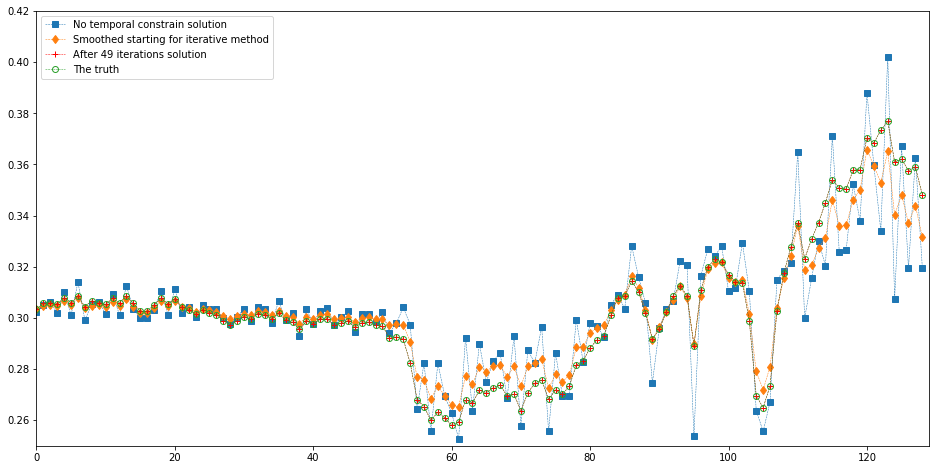

In [670]:
x0 = np.hstack([idct(fv(np.sqrt(lamb_1))*dct(xx[:ny],     norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_2))*dct(xx[ny:2*ny], norm = 'ortho'),  norm = 'ortho'), \
                idct(fv(np.sqrt(lamb_3))*dct(xx[2*ny:],   norm = 'ortho'),  norm = 'ortho')])
x0 = np.matrix(x0).T
st = x0.copy()
b0 = np.matrix(b).T
lamb_1, lamb_2, lamb_3 = 100, 100, 100


def do_dct(r, gamma_1, gamma_2, gamma_3):
    r = np.array(r).ravel() 
    r= [idct(gamma_1 * dct(r[:ny],       norm='ortho'), norm='ortho'), \
        idct(gamma_2 * dct(r[ny:2*ny],   norm='ortho'), norm='ortho'), \
        idct(gamma_3 * dct(r[2*ny:3*ny], norm='ortho'), norm='ortho')] 
    return np.matrix(np.array(r).ravel()).T

pr = None
pz = None
cgu = []
ups = []

dtd = scipy.linalg.block_diag(lamb_1 * udtd, lamb_2 * udtd, lamb_3 * udtd)
x_real = np.linalg.inv(A + dtd).dot(b)

f_dtd = lambda lambs: scipy.linalg.block_diag(lambs[0] * udtd, lambs[1] * udtd, lambs[2] * udtd)
n = 50
for i in range(n):
    
    dtd = f_dtd([lamb_1, lamb_1, lamb_1])
    gamma_1 =  fv(lamb_1)
    gamma_2 =  fv(lamb_2)
    gamma_3 =  fv(lamb_3)
    
    if i==0:
        r = (b0 - (A+dtd).dot(x0))
        z = do_dct(r, gamma_1, gamma_2, gamma_3)
        z = np.matrix(np.array(z).ravel()).T
        p = z
        w = np.zeros(3*ny)
        
    alpha  = r.T.dot(z)/(p.T.dot(A+dtd).dot(p))
    alphas.append(alpha)
    wu = np.array(p.dot(alpha)).ravel() #* w*2
    x0  += np.matrix(wu).T
    pr = r.copy()
    pz = z.copy()
    
    xw = np.array(x0).ravel()
    ig = np.gradient(np.gradient(xw[:ny]))
    gg = np.gradient(np.gradient(xw[ny:2*ny]))
    vg = np.gradient(np.gradient(xw[2*ny:]))
    ig /=(abs(ig)).max()
    gg /=(abs(gg)).max()
    vg /=(abs(vg)).max()
    w = np.hstack([ig, gg, vg])
    
    r   -= (A+dtd).dot(p) * alpha
    sg = do_dct(np.hstack([np.gradient(xw[:ny]), \
            np.gradient(xw[ny:2*ny]), \
            np.gradient(xw[2*ny:])]), fv(100), fv(100), fv(100) )
    sg = np.array(sg).ravel()
    igg = np.gradient(sg[:ny])
    ggg = np.gradient(sg[ny:2*ny])
    vgg = np.gradient(sg[2*ny:])
    igg /= (abs(igg).max())
    ggg /= (abs(ggg).max())
    vgg /= (abs(vgg).max())
    
    w = np.hstack([-1*(igg *(-1*igg)), -1*(ggg *(-1*ggg)), -1*(vgg *(-1*vgg))])
    
    z    = do_dct(r, gamma_1, gamma_2, gamma_3)
    z    = np.array(z).ravel()# - np.array(w).ravel()*np.array(r).ravel()
    z    = np.matrix(z).T
    
    beta = z.T.dot(r)/pz.T.dot(pr)
    p = z + p.dot(beta)
    cgu.append(np.array(x0).ravel())  
    ups.append(np.array(p.dot(alpha)).ravel())
    
    
plt.figure(figsize=(16,8))
plt.plot(xx[:ny],'s--', lw=0.5, label = 'No temporal constrain solution')
plt.plot(st[:ny], 'd--', lw=0.5, label = 'Smoothed starting for iterative method')
plt.plot(x0[:ny], 'r+--', lw=0.5, label = 'After %d iterations solution'%i)
plt.plot(x_real[:ny], 'o--', mfc = 'none',lw=0.5,label = 'The truth')
plt.xlim(0, ny)
plt.ylim(0.25, 0.42)
plt.legend()

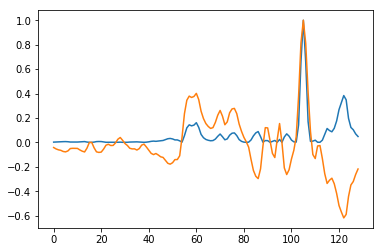

In [672]:
#plt.plot(np.array(r).ravel()[:ny])
#plt.plot(np.array(z).ravel()[:ny])


lamb_1, lamb_2, lamb_3 = 100, 100, 100
gamma_1 =  fv(lamb_1)
gamma_2 =  fv(lamb_2)
gamma_3 =  fv(lamb_3)

sg = do_dct(np.hstack([np.gradient(xw[:ny]), \
            np.gradient(xw[ny:2*ny]), \
            np.gradient(xw[2*ny:])]), fv(100), fv(100), fv(100) )
sg = np.array(sg).ravel()
igg = np.gradient(sg[:ny])
ggg = np.gradient(sg[ny:2*ny])
vgg = np.gradient(sg[2*ny:])
igg /= (abs(igg).max())
ggg /= (abs(ggg).max())
vgg /= (abs(vgg).max())
plt.plot(-1*(igg *(-1*igg)))
plt.plot(igg)
#plt.plot(vgg)
#plt.plot(ggg)

### Trying to get analytical solution, but have not been able to....



$$
\mathbf{C}^{-1}_{prior}\mathbf{x} + \mathbf{K^\top} \mathbf{C}^{-1}_{obs} \mathbf{K}\mathbf{x} + \gamma^{2}\mathbf{D}^{\top}\mathbf{D}\mathbf{x} = \mathbf{C}^{-1}_{prior}\mathbf{x_{prior}} +  \mathbf{K^\top} \mathbf{C}^{-1}_{obs} \mathbf{ref}
$$



$$
\left|\begin{array}{ccc}
a&b&c\\
d&e&f\\
g&h&i\\
\end{array}\right|
= 
\left|\begin{array}{ccc}
\mathbf{k_{iso}}\mathbf{C}^{-1}_{obs}\mathbf{k_{iso}} + \mathbf{C}^{-1}_{prior_{iso}} + \gamma^{2}_{1}\mathbf{d}^{\top}\mathbf{d} &\mathbf{k_{geo}}\mathbf{C}^{-1}_{obs}\mathbf{k_{iso}}&\mathbf{k_{vol}}\mathbf{C}^{-1}_{obs}\mathbf{k_{iso}}\\
\mathbf{k_{iso}}\mathbf{C}^{-1}_{obs}\mathbf{k_{geo}}&\mathbf{k_{geo}}\mathbf{C}^{-1}_{obs}\mathbf{k_{geo}} + \mathbf{C}^{-1}_{prior_{geo}} +\gamma^{2}_{2}\mathbf{d}^{\top}\mathbf{d} &\mathbf{k_{vol}}\mathbf{C}^{-1}_{obs}\mathbf{k_{geo}}\\
\mathbf{k_{iso}}\mathbf{C}^{-1}_{obs}\mathbf{k_{vol}}&\mathbf{k_{geo}}\mathbf{C}^{-1}_{obs}\mathbf{k_{vol}}&\mathbf{k_{vol}}\mathbf{C}^{-1}_{obs}\mathbf{k_{vol}} + \mathbf{C}^{-1}_{prior_{vol}} + \gamma^{2}_{3}\mathbf{d}^{\top}\mathbf{d}
\end{array}\right|
$$


As we add the $\mathbf{D}^{\top}\mathbf{D}$ into the system, there will be two off diagnals with values of $-1$ next to the main diagnal in each subblocks, we cannot do the direct multiplications of diagnals to get the inverse.  However due to the special structure of off diagnals in the block matrix, in which there are only two off diagnals with values of $-1$, then the prodct of block off diagnal with block main diagnal can be computed with main diagnal multiply $-1$ and take $0$ to $(n-2)$ (included) for the lower diagnal and take $1$ to $(n-1)$ (included) for the upper diagnal. The multiplication of two main block diagnals, the main diagnal will be: 

$$ MainDiagnal_1 \times MainDiagnal_2 + diag(\mathbf{d}^{\top}\mathbf{d})$$ 


the upper diagnal with 1 offsets is: 

$$ (-1 \times MainDiagnal_1[0:n-1]) +  (-1 \times MainDiagnal_2[1:n])$$

and the lower diagnal with 1 offset is: 

$$ (-1 \times MainDiagnal_2[0:n-1]) +  (-1 \times MainDiagnal_1[1:n])$$

Then, the upper and lower diagnals with $2$ offsets are $1$s.
Below are two tests on above discriptions:

In [19]:
# test of block main diag and 
# block off diag dot product 
dtd = compose_dtd(1,5)[1].todense()
dtd[range(5), range(5)] = np.random.rand(5)
a = np.diag(np.random.rand(5))
off_diag = -1*np.diag(a)
print(np.allclose(off_diag[:5-1], np.diag(dtd.dot(a), -1))) 
print (np.allclose(off_diag[1:], np.diag(dtd.dot(a), 1)))
# test of block main diag and 
# block main diag dot product
dtd.dot(dtd)
dtd2 = dtd.copy()
dtd2[range(5), range(5)] = np.random.rand(5)
off_diag = -1*np.diag(dtd)
off_diag2 = -1*np.diag(dtd2)
m_diag = np.diag(dtd)*np.diag(dtd2) + np.array([1, 2, 2, 2, 1])
u_diag = off_diag[0:-1] + off_diag2[1:]
l_diag = off_diag2[0:-1] + off_diag[1:]
print (np.allclose(m_diag, np.diag(dtd.dot(dtd2))))
print (np.allclose(u_diag, np.diag(dtd.dot(dtd2), 1)))
print (np.allclose(l_diag, np.diag(dtd.dot(dtd2), -1)))
temp = scipy.sparse.diags([m_diag, u_diag, l_diag, np.ones(5-2), np.ones(5-2)], [0, 1, -1, 2, -2]).todense()
print (np.allclose(temp, dtd.dot(dtd2)))

True
True
True
True
True
True


In [20]:
lamb_1 = 10
ny = len(k_iso)
lamb_dtd = 2 - 2*np.cos(np.arange(ny)*np.pi/ny)
fv = lambda lamb: 1./(1. + lamb*lamb_dtd)
udtd = compose_dtd(1, ny)[1].todense()
dtd = scipy.linalg.block_diag(lamb_1 * udtd, lamb_2 * udtd, lamb_3 * udtd)

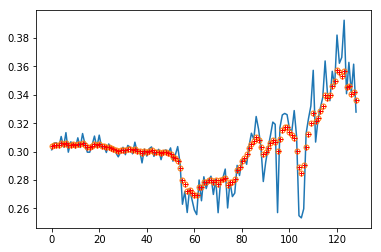

In [21]:
lamb_1 = np.sqrt(lamb_1)
plt.plot(np.linalg.inv(A + dtd).dot(b)[:ny])
#plt.plot(xx[:ny])
plt.plot(np.array(np.linalg.inv(np.identity(ny) + lamb_1 * udtd).dot(xx[:ny])).ravel(), 'o', ms=5, mfc = 'none')
plt.plot(idct(fv(lamb_1)*dct(xx[:ny], norm = 'ortho'),norm = 'ortho'),'r+', ms=5)

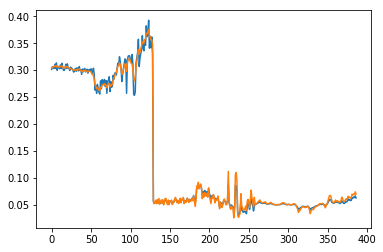

In [22]:
plt.plot(np.linalg.inv(A + dtd).dot(b))
plt.plot(x0)

In [23]:
x0 = np.hstack([idct(fv(lamb_1)*dct(xx[:ny],  norm = 'ortho'),  norm = 'ortho'), idct(fv(lamb_2)*dct(xx[ny:2*ny],  norm = 'ortho'),  norm = 'ortho'), idct(fv(lamb_3)*dct(xx[2*ny:],  norm = 'ortho'),  norm = 'ortho')])

for i in range(1000):
    x = a_inv.dot((A - A - dtd).dot(x0) + b)
    x0 = np.array(x).ravel()

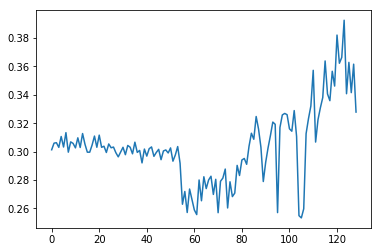

In [24]:
plt.plot(np.linalg.inv(A + dtd).dot(b)[:ny])
plt.plot(x[:ny])

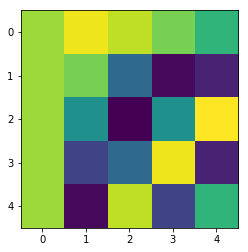

In [25]:
plt.imshow(s)

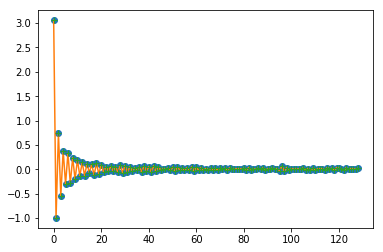

In [26]:
s = dct(np.identity(ny), norm='ortho')
plt.plot(s.dot(xx[:ny]), 'o')
plt.plot(idct(xx[:ny], norm='ortho'))
plt.plot(xx[:ny].dot(s.T), '+')

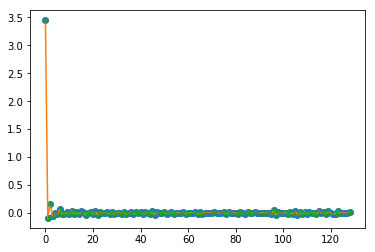

In [27]:
s = dct(np.identity(ny), norm='ortho')
plt.plot((s.T).dot(xx[:ny]), 'o')
plt.plot(dct(xx[:ny], norm='ortho'))
plt.plot(xx[:ny].dot(s.T.T), '+')